In [1]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt
%matplotlib inline

print ( "Python", sys.version )
print ( "Numpy", np.__version__ )
print ( "OpenCV", cv2.__version__ )

Python 3.7.1 (default, Oct 23 2018, 14:07:42) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy 1.16.1
OpenCV 4.0.0


# 1.1

(<matplotlib.image.AxesImage at 0x11562c128>, Text(0.5, 1.0, 'Original'))

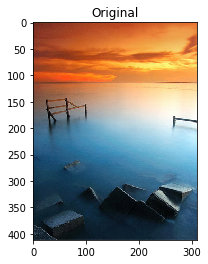

In [10]:
dir = '../Week 2/img/photography-filters.jpg'
img1 = cv2.imread(dir)

#fig = plt.figure(figsize= (3,4))
plt.imshow( cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) ), plt.title("Original")

In [3]:
img1.shape

(412, 310, 3)

In [4]:
def colorreduce(img):
    z = cv2.subtract(img[...],img[...]%50) 
    return z

(<matplotlib.image.AxesImage at 0x11c22f5f8>, Text(0.5, 1.0, 'Color Reduce'))

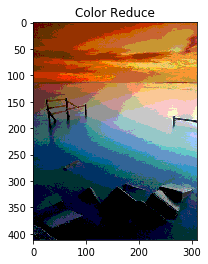

In [5]:
plt.imshow(cv2.cvtColor(colorreduce(img1),cv2.COLOR_BGR2RGB)), plt.title("Color Reduce")

(<matplotlib.image.AxesImage at 0x1180927b8>, Text(0.5, 1.0, 'Original'))

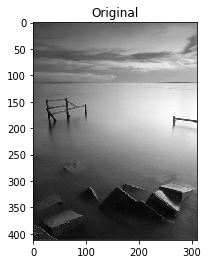

In [15]:
# Import as grey scale
img2 = cv2.imread(dir, cv2.IMREAD_GRAYSCALE)

#fig = plt.figure(figsize= (3,4))
plt.imshow( cv2.cvtColor(img2,cv2.COLOR_BGR2RGB) ), plt.title("Original")

In [7]:
img2.shape

(412, 310)

(<matplotlib.image.AxesImage at 0x11c46d630>, Text(0.5, 1.0, 'Color Reduce'))

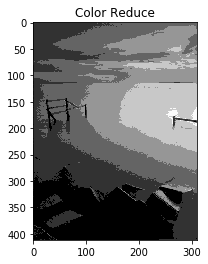

In [8]:
plt.imshow(cv2.cvtColor(colorreduce(img2),cv2.COLOR_BGR2RGB)), plt.title("Color Reduce")

# 1.2

In [9]:
def myFilter(img):
    new_img = img.copy().astype( np.float )

    b = new_img[:,:,0]
    g = new_img[:,:,1]
    r = new_img[:,:,2]

    outputRed = r*0.393 + g*0.769 + b*0.189
    outputGreen = r*0.349 + g*0.686 + b*0.168
    outputBlue = r*0.272 + g*0.534 + b*0.131

    new_img[:,:,0] = outputBlue
    new_img[:,:,1] = outputGreen
    new_img[:,:,2] = outputRed

    new_img /= new_img.max()

    return new_img

In [10]:
cam = cv2.VideoCapture(0)

while True:
    retval, img = cam.read()
    
    new_img = myFilter(img)
    
    if(retval):
        cv2.imshow("Camera", new_img)
    else:
        print("Error, no image from camera")
    
    if (cv2.waitKey(1) == 27):
        break
        
cv2.destroyAllWindows

if cam.isOpened():
    cam.release()

# 1.3

In [11]:
dir1 = '../Week 2/img/pokemon.jpg'
img1 = cv2.imread( dir1 )

dir2 = '../Week 2/img/opencv.png'
img2 = cv2.imread( dir2 )

dir3 = '../Week 2/img/python.png'
img3 = cv2.imread( dir3 )

(<matplotlib.image.AxesImage at 0x11c35a390>, Text(0.5, 1.0, 'img3'))

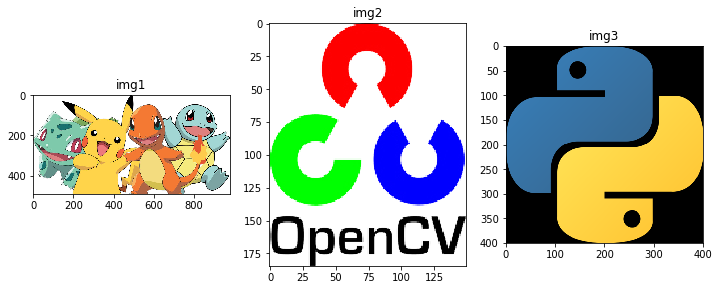

In [12]:
fig = plt.figure(figsize=(12,16))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)) , plt.title('img1')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)) , plt.title('img2')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)) , plt.title('img3')


In [13]:
(nrows, ncols, nchs) = img2.shape
img2.shape

(185, 150, 3)

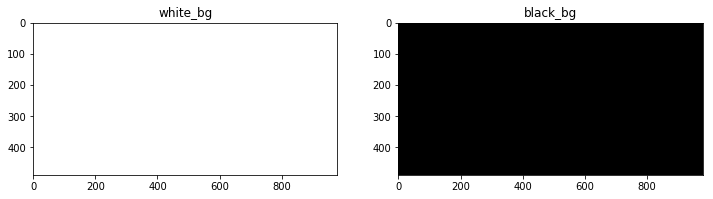

In [14]:
white_bg = np.zeros_like( img1 )
white_bg[...,0] = 255
white_bg[...,1] = 255
white_bg[...,2] = 255

black_bg = np.zeros_like( img1 )

fig = plt.gcf()
fig.set_size_inches(12,8)
plt.subplot(1,2,1),plt.title('white_bg')
plt.imshow(white_bg)
plt.subplot(1,2,2), plt.title('black_bg')
plt.imshow(black_bg)

In [15]:
start_x = 0; end_x = ncols
start_y = 0; end_y = nrows

### นำรูป openCV ไปแปะบนพื้นขาว ที่มีขนาดเท่ากับ pokemon 
- เพื่อที่จะทำการตัดพื้นหลังสีขาวของ openCV ออก และสร้างให้มีขนาดเท่ากับรูป pokemon

(<matplotlib.image.AxesImage at 0x12c3f3630>, Text(0.5, 1.0, 'color_opencv'))

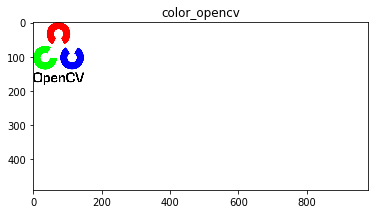

In [16]:
color_opencv = white_bg.copy()
color_opencv[ 0:(end_y-start_y) , 0:(end_x-start_x) ] = img2

plt.imshow( cv2.cvtColor(color_opencv,cv2.COLOR_BGR2RGB) ), plt.title("color_opencv")

### นำรูป openCV ใหม่ที่ได้ มา สร้าง condition โดยเลือกเฉพาะตรงที่มีขาว หรือ value = 255 เพื่อสร้าง mask
- condition คือเลือกเฉพาะที่เป็นสีขาว หรือพื้นหลัง(bg)ของ openCV
- นำ condition ไปใช้ในการสร้าง mask เพื่อที่จะสร้างเป็น fg ของ openCV คือ bg ของ color_opencv ไปแปะบน ภาพพื้นดำ เพื่อให้กลายเป็น mask


(<matplotlib.image.AxesImage at 0x12cd3edd8>, Text(0.5, 1.0, 'mask_opencv'))

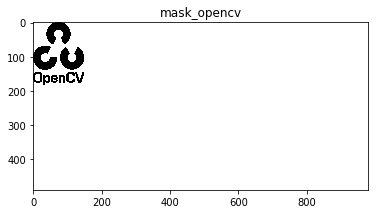

In [17]:
condition = ( color_opencv[:,:,0] == 255 ) & \
            ( color_opencv[:,:,1] == 255 ) & \
            ( color_opencv[:,:,2] == 255 )
mask_opencv = black_bg.copy()
mask_opencv [ condition ] = (255,255,255) 

plt.imshow(mask_opencv), plt.title('mask_opencv')

- condition2 คือ เลือกเฉพาะที่เป็นภาพสีดำ หรือ ภาพข้างหน้า(fg) ของ mask_opencv และ color_opencv

(<matplotlib.image.AxesImage at 0x12f63d470>, Text(0.5, 1.0, 'merge_opencv'))

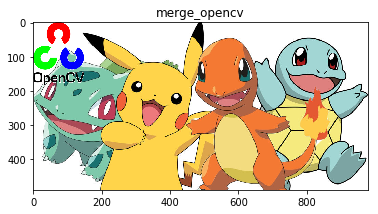

In [18]:
condition2 = ( mask_opencv[...]==0 ) 

merge_opencv = img1.copy()
merge_opencv[condition2] = color_opencv[condition2]

plt.imshow(cv2.cvtColor(merge_opencv,cv2.COLOR_BGR2RGB)),plt.title('merge_opencv')

## 2. นำภาพ python มาทำเป็นลายน้ำวางไว้ตรงกลางภาพ pokemon

In [19]:
(nrows, ncols, nchs) = img3.shape
img3.shape

(400, 400, 3)

## กำหนดบริเวณ ที่ต้องการจะวาง รูป python

(<matplotlib.image.AxesImage at 0x12cdb6400>, Text(0.5, 1.0, 'Crop img'))

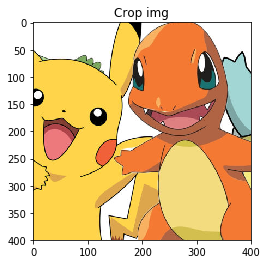

In [20]:
start_x_2 = 300; end_x_2 = 700
start_y_2 = 50; end_y_2 = 450
crop = img1[start_y_2:end_y_2, start_x_2:end_x_2]
plt.imshow( cv2.cvtColor(crop,cv2.COLOR_BGR2RGB) ), plt.title("Crop img")

### ทำการตัดพื้นหลังสีดำของรูป python ออกก่อน โดยการสร้าง mask
- นำรูป python ไปวางไว้บน canvas สีดำ ขนาดเท่า pokemon เพื่อใช้ในการตัดพื้นหลังสีดำออก และ เพื่อให้มีขนาดเท่ารูป pokemon

(<matplotlib.image.AxesImage at 0x12ff88198>, Text(0.5, 1.0, 'color_python'))

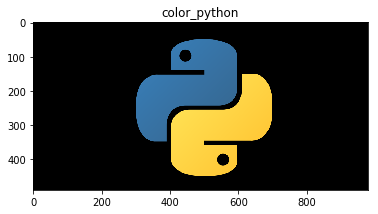

In [21]:
color_python = black_bg.copy()
color_python[ start_y_2:(end_y_2) , start_x_2:(end_x_2) ]= img3
plt.imshow( cv2.cvtColor(color_python,cv2.COLOR_BGR2RGB) ), plt.title("color_python")

### นำรูป python ใหม่ที่ได้ มา สร้าง condition โดยเลือกเฉพาะตรงที่มีดำ หรือ value = 0 เพื่อสร้าง mask
- condition3 คือเลือกเฉพาะที่เป็นสีดำ หรือพื้นหลัง(bg)ของ color_python
- นำ condition3 ไปใช้ในการสร้าง mask เพื่อที่จะสร้างเป็น fg ของ python คือ bg ของ color_python ไปแปะบน ภาพพื้นดำ เพื่อให้กลายเป็น mask

(<matplotlib.image.AxesImage at 0x1303b1c50>, Text(0.5, 1.0, 'mask_python'))

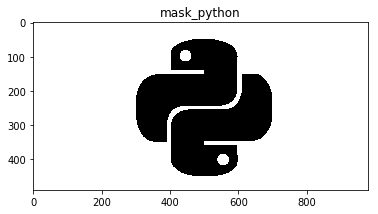

In [22]:
condition3 = ( color_python[:,:,0] == 0 ) & \
            ( color_python[:,:,1] == 0 ) & \
            ( color_python[:,:,2] == 0 )
mask_python = black_bg.copy()
mask_python [ condition3 ] = (255,255,255) 
# เอา bg สีดำ มาใส่สีขาว ลงในตำแหน่งที่เป็นสีดำของ black_merge
plt.imshow(mask_python),plt.title('mask_python')

## นำภาพ color_python ไป รวมกับ merge_opencv โดยให้ color_python เป็นลายน้ำ
- ก่อนอื่น แปลงพื้นหลัง color_python ให้เป็น สีขาวก่อน 
- เพื่อให้ภาพที่ได้ ไม่ถูกสีดำกลืน 

(<matplotlib.image.AxesImage at 0x1305a0358>,
 Text(0.5, 1.0, 'color_white_python'))

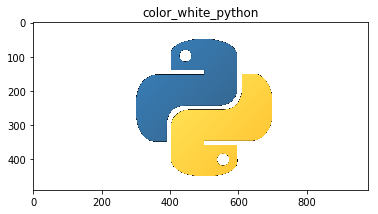

In [23]:
color_white_python = color_python.copy()
color_white_python[color_white_python[:,:,0] == 0] = (255)
color_white_python[color_white_python[:,:,1] == 0] = (255)
color_white_python[color_white_python[:,:,2] == 0] = (255)
plt.imshow(cv2.cvtColor(color_white_python,cv2.COLOR_BGR2RGB)),plt.title('color_white_python')

### ทำการรวมภาพ โดยการใช้ addWeighted function

(<matplotlib.image.AxesImage at 0x130b141d0>, Text(0.5, 1.0, 'Final merge'))

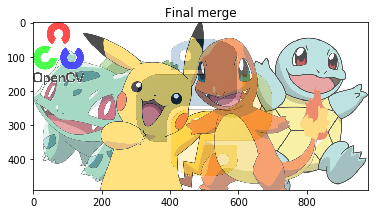

In [24]:
merge_all = merge_opencv.copy()
add = cv2.addWeighted(merge_all,0.7,color_white_python, 0.3,0)
plt.imshow(cv2.cvtColor(add,cv2.COLOR_BGR2RGB)), plt.title('Final merge')


# ปัญหาคือ มัน weight ทั้งรูปเลย แต่จริงๆ เราต้องการ weight เฉพาะส่วน

(<matplotlib.image.AxesImage at 0x130fd3940>, Text(0.5, 1.0, 'Final merge'))

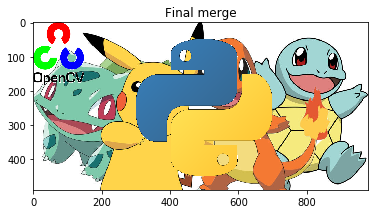

In [25]:
condition4 = (mask_python[...]==0)

merge_python = merge_opencv.copy()

merge_python[condition4] = color_white_python[condition4]
plt.imshow(cv2.cvtColor(merge_python,cv2.COLOR_BGR2RGB)), plt.title('Final merge')

(<matplotlib.image.AxesImage at 0x131514668>, Text(0.5, 1.0, 'Crop_merge'))

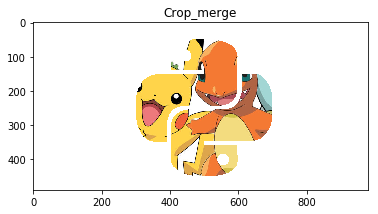

In [27]:
crop_merge = merge_opencv.copy()
crop_merge[mask_python[:,:,0] != 0] = (255)
crop_merge[mask_python[:,:,1] != 0] = (255)
crop_merge[mask_python[:,:,2] != 0] = (255)
plt.imshow(cv2.cvtColor(crop_merge,cv2.COLOR_BGR2RGB)), plt.title('Crop_merge')

(<matplotlib.image.AxesImage at 0x131856c50>, Text(0.5, 1.0, 'crop_weight'))

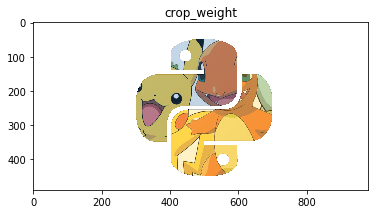

In [28]:
crop_weight = cv2.addWeighted(crop_merge,0.7,color_white_python, 0.3,0)
plt.imshow(cv2.cvtColor(crop_weight,cv2.COLOR_BGR2RGB)), plt.title('crop_weight')

(<matplotlib.image.AxesImage at 0x131c6dac8>, Text(0.5, 1.0, 'Final merge'))

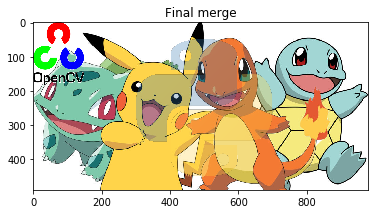

In [29]:
merge_python3 = merge_opencv.copy()

merge_python3[condition4] = crop_weight[condition4]
plt.imshow(cv2.cvtColor(merge_python3,cv2.COLOR_BGR2RGB)), plt.title('Final merge')

# Gradient magnitude

In [27]:
src = np.array([[80,255,200,100,0,0,100,200,255],
                [90,255,110,80,50,50,80,255,0],
               [255,255,255,255,255,255,255,255,255]],dtype=np.uint8)
sobel_x = cv2.Sobel( src, cv2.CV_64F,1,0, ksize = 3)

In [28]:
src.shape

(3, 9)

In [29]:
sobel_x

array([[   0.,  280., -660., -520., -260.,  260.,  810.,  150.,    0.],
       [   0.,  160., -505., -320., -160.,  160.,  610.,   -5.,    0.],
       [   0.,   40., -350., -120.,  -60.,   60.,  410., -160.,    0.]])

In [ ]:
top = bottom = ker
src_pad = cv2.copyMakeBorder(src,
                            top,bottom,left,right,
                            cv2.BORDER_CONSTANT, value=0)

(<matplotlib.image.AxesImage at 0x1180eca20>, Text(0.5, 1.0, 'Crop'))

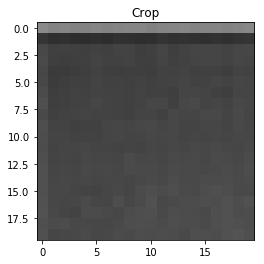

In [16]:
crop = img2[0:20, 0:20]
plt.imshow( cv2.cvtColor(crop,cv2.COLOR_BGR2RGB) ), plt.title("Crop")

In [18]:
crop[...]

array([[138, 131, 132, 130, 130, 133, 130, 132, 133, 133, 129, 132, 133,
        134, 131, 132, 132, 130, 132, 135],
       [ 53,  47,  48,  46,  45,  47,  45,  49,  48,  46,  47,  52,  49,
         50,  49,  48,  50,  48,  51,  53],
       [ 72,  64,  65,  64,  63,  65,  64,  67,  67,  62,  64,  69,  63,
         66,  69,  69,  69,  67,  70,  71],
       [ 74,  63,  62,  63,  64,  68,  65,  65,  67,  63,  63,  68,  64,
         66,  68,  69,  69,  67,  70,  69],
       [ 71,  59,  59,  61,  63,  66,  63,  62,  63,  63,  62,  66,  66,
         67,  64,  65,  64,  62,  67,  66],
       [ 72,  60,  62,  64,  64,  67,  65,  65,  64,  66,  64,  66,  67,
         69,  66,  66,  69,  67,  70,  69],
       [ 75,  62,  64,  66,  65,  67,  66,  66,  65,  67,  65,  65,  63,
         69,  69,  68,  65,  63,  69,  69],
       [ 79,  63,  64,  66,  66,  70,  67,  66,  65,  67,  70,  70,  64,
         71,  73,  68,  70,  67,  72,  70],
       [ 73,  64,  66,  67,  68,  67,  67,  66,  65,  68,  68,  